## 환율 데이터 가져오기

- 한국은행 API 사용

- 한국을 기준으로 다른 국가의 환율을 비교

In [114]:
import json
from urllib.request import urlopen
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.core.display import display, HTML

display(HTML("<style>.container{width:90% !important;}</style>"))

sns.set_palette("pastel")
sns.set_style('whitegrid')

f = open('api_key.txt', 'r')
api_key = f.readline()
f.close()

key = api_key
stat_code = pd.read_csv('stat_code.csv', dtype = str, encoding = 'euc-kr') # 한국은행 api통계코드 참조

nara = stat_code['Stat_code'].to_list()
url = "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/036Y001/DD/20180401/date/0000001/?/?/"  # 환율

ex_nations = []
ex_rates = []
time = []

for i in range(len(nara)):

    data=json.loads(urlopen(url[:-12]+nara[i]+url[-5:]).read())
    
    try:
        data2=data['StatisticSearch']['row']
        nation = stat_code['Nation'][i]
        ex_nations.append(nation)
        
        for k in range(len(data2)):
            if i==0:
                time.append(int(data2[k]['TIME']))
            ex_rate = float(data2[k]['DATA_VALUE'])
            ex_rates.append(ex_rate)
    except:
        print(nation,'No Search')

time = pd.to_datetime(pd.DataFrame(time)[0].apply(lambda x: str(x))).to_list()

ex_data = pd.DataFrame(np.reshape(ex_rates, (-1,len(data2))), 
                       columns = time,
                       index = ex_nations)
ex_data.head()

유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
뉴질랜드달러 No Search
인도네시아루피아(100루피아) No Search


,2018-04-02,2018-04-03,2018-04-04,2018-04-05,2018-04-06,2018-04-09,2018-04-10,2018-04-11,2018-04-12,2018-04-13,...,2021-08-17,2021-08-18,2021-08-19,2021-08-20,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-30
미국달러,1064.40,1058.10,1057.80,1057.60,1059.50,1066.00,1067.50,1067.70,1066.40,1068.70,...,1167.80,1174.90,1172.70,1174.50,1176.70,1174.00,1168.00,1166.50,1168.10,1170.80
일본엔(100엔),1000.80,999.67,992.82,990.68,989.03,997.52,1000.33,996.17,998.27,996.50,...,1068.97,1071.94,1068.08,1069.92,1070.94,1070.34,1064.77,1060.31,1061.47,1065.87
유로,1311.07,1301.73,1298.08,1299.31,1297.41,1308.52,1315.53,1319.57,1319.08,1317.49,...,1375.67,1375.46,1373.76,1371.52,1376.03,1379.04,1373.16,1373.09,1373.39,1381.31
영국파운드,1493.62,1487.11,1487.64,1489.89,1483.78,1502.05,1508.54,1513.73,1512.42,1521.03,...,1616.47,1614.14,1613.34,1601.25,1603.08,1611.37,1603.43,1605.45,1600.65,1611.49
캐나다달러,825.85,819.28,826.21,828.94,829.19,834.47,840.22,847.58,848.23,848.88,...,929.00,930.84,926.89,915.54,917.72,927.95,927.54,926.42,921.00,928.25


- 계속 StatisticSearch 없다고 오류가 뜨길래 오류나는 부분을 보았더니.. 몇몇 나라는 제공이 안되고 있었다.
  - 결국 해결하긴 했는데 문제 찾는데 오래걸렸다..
- 10개정도가 제외되고 한국 -> 다른나라(43개)로 가는 환율을 가져오는데 성공했다.

In [69]:
ex_data.T.corr()

,미국달러,일본엔(100엔),유로,영국파운드,캐나다달러,스위스프랑,홍콩달러,스웨덴크로나,호주달러,덴마크크로네,...,헝가리포린트,폴란트즈워티,체코코루나,카타르리얄,이스라엘셰켈,요르단디나르,터키리라,남아프리카공화국랜드,이집트파운드,위안
미국달러,1.000000,0.872316,0.414925,0.246711,0.527110,0.598382,0.991272,-0.104933,-0.269099,0.374772,...,0.035289,0.341442,0.119630,0.994413,0.604400,0.999898,-0.040392,-0.422031,0.771128,0.319833
일본엔(100엔),0.872316,1.000000,0.598628,0.267473,0.489562,0.781278,0.899677,0.124500,-0.128850,0.566772,...,-0.147011,0.350430,0.191950,0.865294,0.731482,0.874606,-0.205366,-0.582781,0.858877,0.403481
유로,0.414925,0.598628,1.000000,0.661855,0.659658,0.880104,0.490725,0.809499,0.552930,0.998649,...,-0.225157,0.401638,0.677572,0.391133,0.774735,0.417861,-0.607693,-0.522313,0.674737,0.687531
영국파운드,0.246711,0.267473,0.661855,1.000000,0.748462,0.613974,0.307968,0.613250,0.543458,0.664889,...,-0.274470,0.169900,0.729641,0.216768,0.729781,0.251043,-0.560019,-0.163382,0.597527,0.747587
캐나다달러,0.527110,0.489562,0.659658,0.748462,1.000000,0.674756,0.557716,0.458687,0.460013,0.649145,...,-0.143316,0.309720,0.740779,0.501577,0.813856,0.531105,-0.496190,-0.107944,0.711528,0.610944
스위스프랑,0.598382,0.781278,0.880104,0.613974,0.674756,1.000000,0.686045,0.630511,0.297388,0.870906,...,-0.471322,0.196333,0.486329,0.572599,0.917393,0.602126,-0.695578,-0.708392,0.898029,0.644776
홍콩달러,0.991272,0.899677,0.490725,0.307968,0.557716,0.686045,1.000000,-0.010204,-0.214903,0.453292,...,-0.064245,0.313049,0.149915,0.981930,0.677010,0.991634,-0.141074,-0.502526,0.834654,0.378838
스웨덴크로나,-0.104933,0.124500,0.809499,0.613250,0.458687,0.630511,-0.010204,1.000000,0.821108,0.832809,...,-0.350066,0.147661,0.656860,-0.129643,0.535088,-0.102032,-0.698725,-0.339629,0.315761,0.543222
호주달러,-0.269099,-0.128850,0.552930,0.543458,0.460013,0.297388,-0.214903,0.821108,1.000000,0.581312,...,-0.167897,0.136728,0.650159,-0.283607,0.336385,-0.265697,-0.504009,0.017067,0.059866,0.395818
덴마크크로네,0.374772,0.566772,0.998649,0.664889,0.649145,0.870906,0.453292,0.832809,0.581312,1.000000,...,-0.245827,0.374123,0.677063,0.350289,0.765873,0.377780,-0.626020,-0.519174,0.654135,0.693084


- 상관성을 확인해보았다.
- 주요국(일본, 미국 등)의 환율은 높은 상관성을 보이기도한다.
- 국제적인 영향을 많이 받는 환율인데 생각보다 상관성이 다양하게 분포되어있다.

C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


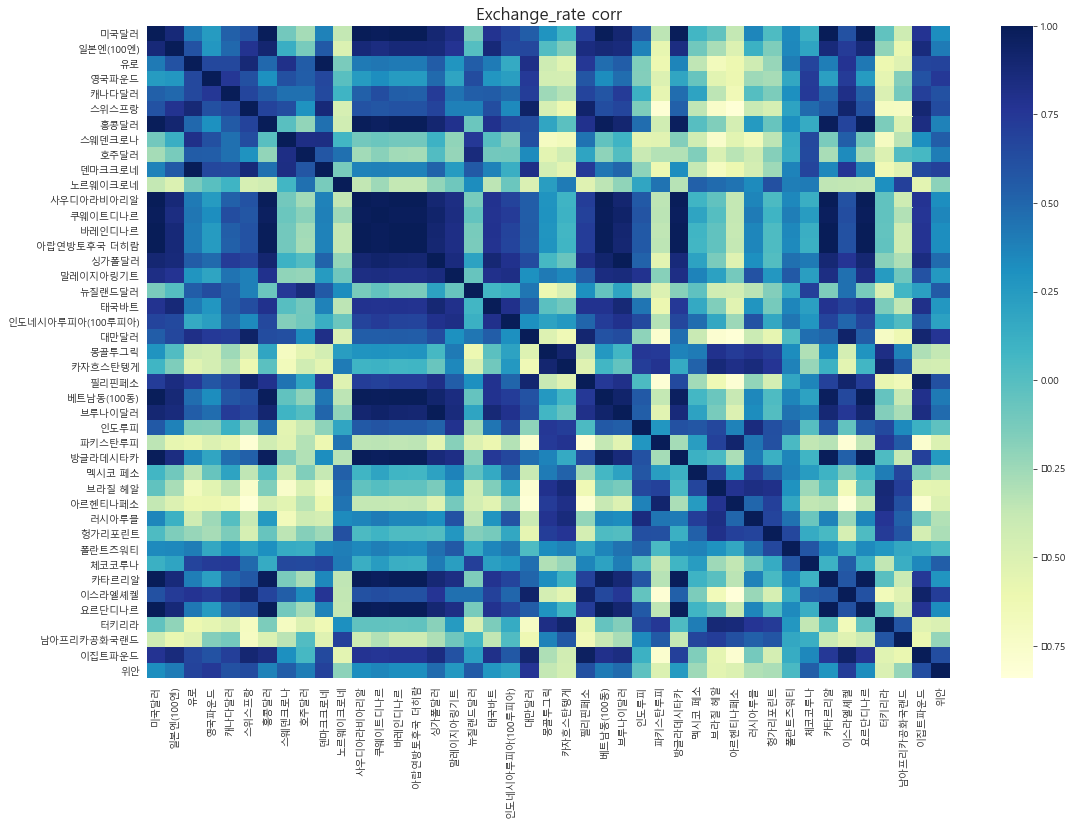

In [79]:
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
f, ax = plt.subplots(figsize = (18,12))

sns.heatmap(ex_data.T.corr(), 
            cmap ='YlGnBu',
            annot = False).set_title('Exchange_rate corr', fontsize = 17)

plt.show()

- 히트맵을 그려도 판단이 잘 되지않는다.
- k-means clustering을 사용해서 cluster를 나눠보겠다.

In [150]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()

s_ts = to_time_series_dataset(scaler.fit_transform(ex_data.T).T)

dist = []
scores = [] # 실루엣 스코어

for k in range(2,12):
    k_means = TimeSeriesKMeans(n_clusters = k, metric= 'dtw', max_iter = 5, random_state = 1234)
    k_means.fit(s_ts)
    pred = k_means.predict(s_ts)
    score = silhouette_score(s_ts.reshape(-1,len(data2)), pred)
    scores.append(score)
    dist.append(k_means.inertia_)
    
print(scores)
k_means.cluster_centers_.shape

[0.3923699831902809, 0.3392570783374238, 0.30975350517418593, 0.25599854248683385, 0.22426446695373878, 0.20856002630152995, 0.2576390884502391, 0.25912631484853377, 0.24948254050051738, 0.26012491544819594]


(11, 845, 1)

- 환율마다 단위가 다 다르므로 min_max_scaling을 진행해서 전부 0~1사이로 만들고 clustering을 진행(clustering이 잘되길...)
- 평가를 위해 실루엣 score로 k-means의 k값을 평가해보겠다.

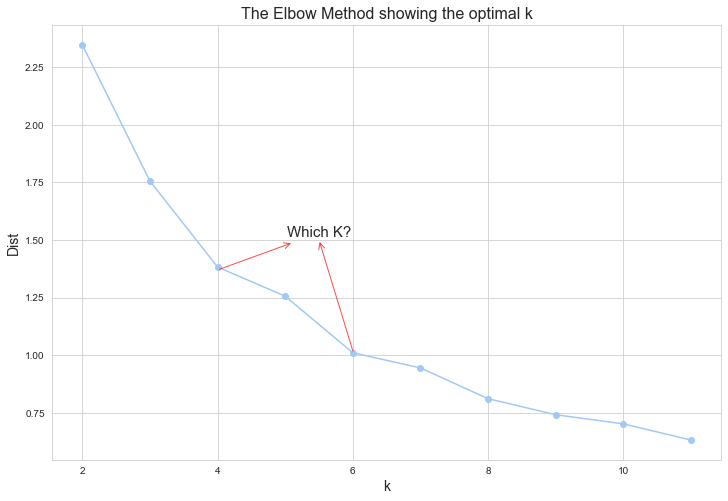

In [181]:
f, ax = plt.subplots(figsize = (12,8))
plt.plot(range(2,12), dist, '-o')

plt.annotate('Which K?',
             ha = 'center', 
             va = 'bottom',
             xytext = (5.5, 1.5),
             xy = (4, 1.37),
             fontsize = 15,
             arrowprops = {
                 'edgecolor':'r', 
                 'alpha':0.7,
                 'arrowstyle':'<-'
             })

plt.annotate('',
             ha = 'center', 
             va = 'bottom',
             xytext = (5.5, 1.5),
             xy = (6.01, 1.01),
             fontsize = 15,
             arrowprops = {
                 'edgecolor':'r', 
                 'alpha':0.7,
                 'arrowstyle':'<-'
             })

plt.xlabel('k', fontsize = 14)
plt.ylabel('Dist', fontsize = 14)
plt.title('The Elbow Method showing the optimal k', fontsize = 16)
plt.show()

- Elbow로 보니까 k=4? 음.. k=6인거같기도 하다.
- k=4, k=6둘다 해볼 예정이다